In [3]:
import os
import pandas as pd

filepaths = []

for file in os.listdir("ml-25m"):
    filepath = "./ml-25m/" + f"{file}"
    filepaths.append(filepath)


filepaths
    

['./ml-25m/links.csv',
 './ml-25m/tags.csv',
 './ml-25m/genome-tags.csv',
 './ml-25m/ratings.csv',
 './ml-25m/README.txt',
 './ml-25m/genome-scores.csv',
 './ml-25m/movies.csv']

In [9]:
with open(filepaths[2]) as gentags, open(filepaths[-2]) as genscores:
    df_gentags = pd.read_csv(gentags)
    df_genscores = pd.read_csv(genscores)




(   movieId  tagId  relevance
 0        1      1    0.02875
 1        1      2    0.02375
 2        1      3    0.06250
 3        1      4    0.07575
 4        1      5    0.14075,
    tagId           tag
 0      1           007
 1      2  007 (series)
 2      3  18th century
 3      4         1920s
 4      5         1930s)

In [10]:
df_genscores.describe()

,movieId,tagId,relevance
count,1.558445e+07,1.558445e+07,1.558445e+07
mean,4.602249e+04,5.645000e+02,1.163679e-01
std,5.535221e+04,3.256254e+02,1.544722e-01
min,1.000000e+00,1.000000e+00,2.500000e-04
25%,3.853750e+03,2.827500e+02,2.400000e-02
50%,8.575500e+03,5.645000e+02,5.650000e-02
75%,8.018650e+04,8.462500e+02,1.407500e-01
max,2.064990e+05,1.128000e+03,1.000000e+00


In [12]:
df_genscores['relevance'].max(), df_genscores['relevance'].min()

(1.0, 0.0002499999999999)

relevance has a scale from 0 to 1, maybe discard regarding to relevance at some point ? (too low relevance)

In [16]:
with open(filepaths[3]) as scores:
    df_scores = pd.read_csv(scores)


len(df_scores.query("userId == 1"))

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510
...,...,...,...,...
65,1,27193,3.0,1147879774
66,1,27266,4.5,1147879365
67,1,27721,3.0,1147869115
68,1,31956,3.5,1147877610


Maybe toss users with too few reviews ?

In [30]:
movies_per_user = []

for user in range(1, len(df_scores['userId'].unique())):
    movies = len(df_scores.query(f"userId == {user}"))
    movies_per_user.append(movies)

movies_per_user



KeyboardInterrupt: 

In [33]:


#range(1, df_scores['userId'].unique())

#len(df_scores['userId'].unique())

#%timeit len(df_scores.query(f"userId == 14567"))

%timeit df_scores.query(f"userId == 14567").shape[0]

f"userId == 14567"

114 ms ± 254 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [64]:
v = df_scores.userId.value_counts()
df = pd.DataFrame(v)
df.describe()

,userId
count,162541.000000
mean,153.807932
std,268.047590
min,20.000000
25%,36.000000
50%,71.000000
75%,162.000000
max,32202.000000


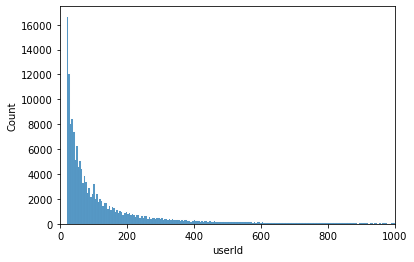

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df, x = df['userId'])
plt.xlim(0,1000)
plt.show()

In [36]:
df_scores.query("userId == 80974")

,userId,movieId,rating,timestamp
12513537,80974,1,4.0,997044423
12513538,80974,2,4.0,997144402
12513539,80974,3,3.0,997144734
12513540,80974,4,3.0,997146175
12513541,80974,5,3.0,997145617
...,...,...,...,...
12522710,80974,129514,2.5,1432073042
12522711,80974,135224,0.5,1450989889
12522712,80974,135955,3.0,1439058843
12522713,80974,136542,4.0,1439060065


is it realistic that an user has seen more than 2000 movies ?